## **Introduction to Image Processing**

## Interpolation and Blending

 Importing necessary libraries/modules and functions

In [10]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned ON


### ** Resizing an image size using different interpolation functions**

**1. ** Resize the lena or vibot image using nearest, bilinear and bicubic function.

You can define your function which accept the model and resize size from the user or just run a script.

In [13]:
def resize_im(image, factor, model):
    return misc.imresize(image, factor, model)

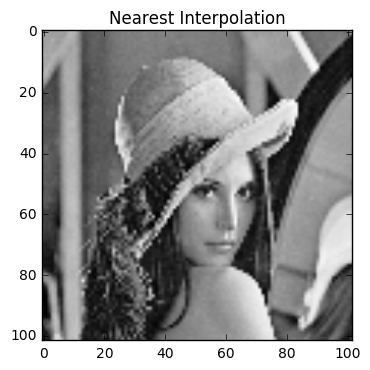

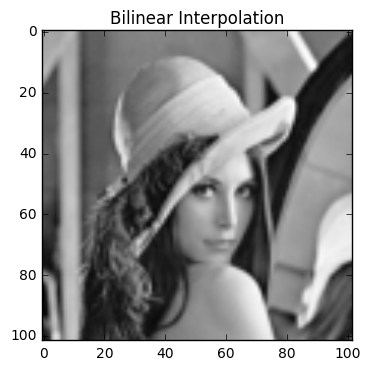

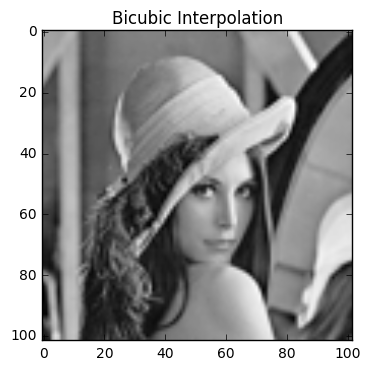

In [18]:
#By using Nearest-neighbor interpolation
lena_im = img_as_float(io.imread('./images/lena-grey.bmp', as_grey=True))

im_resize = resize_im(lena_im,20,'nearest');

plt.figure
plt.title('Nearest Interpolation')
plt.imshow(im_resize, cmap=plt.cm.gray)
plt.show()  


#By using Bilinear interpolation

im_resize2 = resize_im(lena_im,20,'bilinear');

plt.figure
plt.title('Bilinear Interpolation')
plt.imshow(im_resize2, cmap=plt.cm.gray)
plt.show()  

#By using Bicubic interpolation

im_resize3 = resize_im(lena_im,20,'bicubic');

plt.figure
plt.title('Bicubic Interpolation')
plt.imshow(im_resize3, cmap=plt.cm.gray)
plt.show()  

**2. ** Similar to the function of `my_blending.m` that you saw before define your function of blending.

Blend the lena image and vibot image using simple, alpha and pyramid method.   

Pyramid blending method: 
1. Create a mask the same size as your input images 
2. Create Laplacian pyramid of the input images 
    2.1. Create Gaussian pyramids of the input images
    2.2. Create Laplacian pyramids using the Gaussian pyramids
3. Create Gaussian pyramid for the region mask
4. Blend the two laplacian pyramids using the pyramid of the mask as weigh 
    $$ BL = L_1 * (GM) + L_2 *(1 - GM)$$
5. Colapse the pyramid to get the final image 
    $$rescale(rescale(rescale(BL_3)+BL_2)+BL_1)+BL_0$$

Note : For pyramid blending approach, you can use:
    * transform.rescale for upscaling your images
    * transform.pyramid_gaussian for building your pyramids
    * The output of transform.pyramid_gaussian is a type generator and you need to convert it to a list :
    
        b = [a for a in Gaussian_pyramid]


In [7]:
def blend_im(image1, image2, method, w):
    if method=='simple':
        image3=np.zeros((image1.shape[0],image1.shape[1]));
        image3[:,0:np.ceil(image3.shape[1]/2)-1] = image1[:,0:np.ceil(image1.shape[1]/2)-1];
        image3[:,np.ceil(image3.shape[1]/2):] = image2[:,np.ceil(image1.shape[1]/2):];
    elif method=='alpha':
        image3=np.zeros((image1.shape[0],image1.shape[1]));
        image3[:,0:np.ceil(image3.shape[1]/2)-w-2] = image1[:,0:np.ceil(image1.shape[1]/2)-w-2];
        image3[:,np.ceil(image3.shape[1]/2)+w+2:] = image2[:,np.ceil(image1.shape[1]/2)+w+2:];
        # in the window region:
        x1 = np.ceil(image3.shape[1]/2)-w;
        x2 = np.ceil(image3.shape[1]/2)+w;
        x = np.linspace(x1,x2,w*2);

        a = np.divide(x,(x1-x2)) - (x2/(x1-x2)); #alpha parameter
        a = np.tile(a , (image3.shape[0], 1));

        image3[:, x1:x2] = (np.multiply(a, image1[:, x1:x2])) + (np.multiply((1-a), image2[:, x1:x2]));
        
    elif method=='pyramid':
        mask=np.ones((image1.shape[0],image1.shape[1]));
        pyr_gauss_1=transform.pyramid_gaussian(image1);
        pyramid_gauss_1 = [a for a in pyr_gauss_1];
        pyr_gauss_2=transform.pyramid_gaussian(image2);
        pyramid_gauss_2 = [a for a in pyr_gauss_2];
        pyr_gauss_3=transform.pyramid_gaussian(mask);
        pyramid_gauss_3 = [a for a in pyr_gauss_3];
        pyr_lap_1=transform.pyramid_laplacian(pyramid_gauss_1);
        pyramid_laplace_1 = [a for a in pyr_lap_1];
        pyr_lap_2=transform.pyramid_laplacian(pyramid_gauss_2);
        pyramid_laplace_2 = [a for a in pyr_lap_2];
        
        BL = np.multiply(pyr_lap_1, pyramid_gauss_3) + np.multiply(pyr_lap_2, (1-pyr_gauss_3));

        print(BL)
        
        image3=0;
        
    return image3
    

Use the `orange.jpeg` and `apple.jpeg` imgages and blend them using simple, alpha and pyramid approach.

C:\Users\elyamo\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\elyamo\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


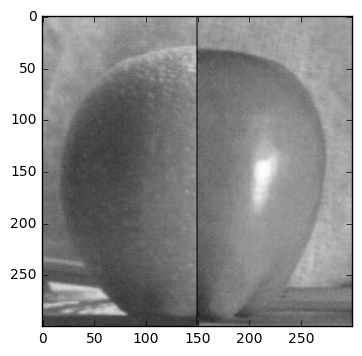

C:\Users\elyamo\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\elyamo\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\elyamo\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


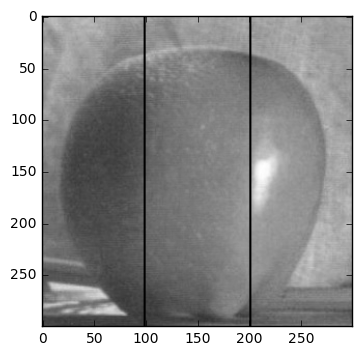

ValueError: can not convert object to float64.

In [8]:
orange_im = img_as_float(io.imread('./images/orange.jpeg', as_grey=True))
apple_im = img_as_float(io.imread('./images/apple.jpeg', as_grey=True))

im_blended = blend_im(orange_im,apple_im,'simple',0);

plt.figure
plt.imshow(im_blended, cmap=plt.cm.gray)
plt.show()  

im_blended2 = blend_im(orange_im,apple_im,'alpha',50);

plt.figure
plt.imshow(im_blended2, cmap=plt.cm.gray)
plt.show()  

im_blended3 = blend_im(orange_im,apple_im,'pyramid',0);

plt.figure
plt.imshow(im_blended3, cmap=plt.cm.gray)
plt.show()  

Show the your answers.